# Introduction to Bioinformatics

**Dataset:**

Sources:
- Using NCBI datasets.
- Other sources but not used here: EBI, SRS, BioMart, ExPASy, Pubmed, Entrez

Specific datasets:
- [Leukemia nucleotides - LIF=leukemia inhibitory factor](https://www.ncbi.nlm.nih.gov/nuccore/S73374.1). Identification of two elements involved in regulating expression of the murine leukaemia inhibitory factor gene
    
**Goal:**
- DNA sequence analysis
    - base stats
    - [GC content](https://en.wikipedia.org/wiki/GC-content) - Percent of G or C bases in DNA. DNA with low GC-content is less stable than DNA with high GC-content. TODO: relevance 
    - 


**Resources:**
- `Biopython`: Py package for sequencing 
- `Rosalind`:  An online resource that is a series interactive learning modules for bioinformatics 


**Tutorial Playlist**
- [Bioinformatics and Python Playlist - a plethora](https://www.youtube.com/watch?v=CXv7Wd1VwVU&list=PLymkKpD_KgfmYyscPiXNlJj7Jkth_dQhb) - You need to be selective of what to work with;
- [BioPython, C.G.Oliver](https://youtu.be/qQ7rIpB4oOw?t=1041)


In [1]:
from collections import Counter
import nltk

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Sequence:
    def __init__(self, seq):
        self.seq = seq
        self.counter = Counter(c.lower().strip() for c in seq ) 
    
    def num_stats(self):
        # order: len, gc, 
        N = sum(self.counter.values() )
        return (self.seq[:7], N, (self.counter['g']+self.counter['c'])/max(N,1))
        
    def stats(self):
        # order: len, gc, 
        s, N, gc = self.num_stats()
        return f"{s} \t {N} \t {gc}"
    
    def gen_kmer_motifs(self, k=6): ##n-gram 
        return [ self.seq[x:x+k].lower() for x in range(len(self.seq) - k + 1)]

        
class Dna:
    sequences = []
    all_counter = None 
    def gene_load(self, fname):
        with open(fname, "r") as fd:
            for l in fd.readlines():
                if not l.startswith(">") and len(l.strip()) > 0:
                    self.sequences.append( Sequence(l.strip() ) )                    
        self.all_counter = Counter( c for seq in self.sequences for c in seq.seq.lower() )
        
    def gc_content_per_sequence(self):
        pass
            
    def gene_stats(self):        
        sb = []
        
        sb.append(f"1. Count of bases \n")
        N = sum(self.all_counter.values())
        for n,c in self.all_counter.most_common():
            sb.append( f"\tBase { n.upper() } : {c} {int(c)/N}\n")
            
        sb.append(f"\n2. GC Content \n")
        sb.append( f"\tGC Content: { (self.all_counter['g']+self.all_counter['c'])/N }\n")
        
        sb.append(f"\n3. Sample 3 \n")
        sb.append(f"\n\tStart of seq \tCount \tGC Content\n")
        for s in range(4):
            sb.append(f"\t{self.sequences[s].stats() }\n")
                                          
        return sb
    
    def __str__(self):            
        return f"DNA: # seqs: {len(self.sequences)} \t counter: {len(self.all_counter)}"+\
                f"\n{ ''.join(self.gene_stats() ) }"

In [3]:
lif_fname = "../data/LIF_NCBI_sequence.fasta"
dna = Dna()
dna.gene_load(lif_fname)
print("Leukemia - LIF\n", dna)

Leukemia - LIF
 DNA: # seqs: 99 	 counter: 4
1. Count of bases 
	Base G : 1985 0.28830791575889614
	Base C : 1851 0.26884531590413946
	Base T : 1534 0.22280319535221496
	Base A : 1515 0.22004357298474944

2. GC Content 
	GC Content: 0.5571532316630355

3. Sample 3 

	Start of seq 	Count 	GC Content
	GAATTCC 	 70 	 0.5714285714285714
	GGCAGGC 	 70 	 0.6
	GGGCCAG 	 70 	 0.7285714285714285
	CCGGGGC 	 70 	 0.5714285714285714



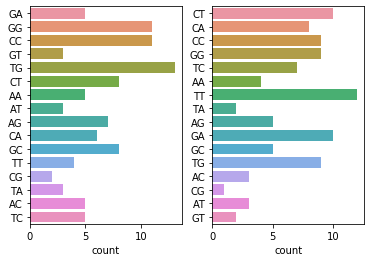

In [4]:
# for s in dna.sequences:
#     print(s.stats() )


#plt.plot([s.seq[0] for s in dna.sequences if len(s.seq) > 0] )
# plt.subplot(1,4,1)
# sns.countplot(y=[s.seq[0] for s in dna.sequences if len(s.seq) > 0] )#.title("Start base")
# plt.subplot(1,4,2)
# sns.countplot(y=[s.seq[-1] for s in dna.sequences if len(s.seq) > 0] )#.title("End base")

plt.subplot(1,2,1)
sns.countplot(y=[s.seq[0:2] for s in dna.sequences if len(s.seq) > 0] )#.title("Start base")
plt.subplot(1,2,2)
sns.countplot(y=[s.seq[-2:] for s in dna.sequences if len(s.seq) > 0] )#.title("End base")
plt.show();

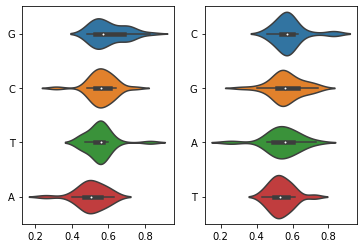

In [5]:
## Start base
plt.subplot(1,2,1)
sns.violinplot(
    y=[s.num_stats()[0][0] for s in dna.sequences ], 
    x=[ s.num_stats()[2] for s in dna.sequences ],
);

## End base
plt.subplot(1,2,2)
sns.violinplot(
    y=[s.num_stats()[0][-1] for s in dna.sequences ], 
    x=[ s.num_stats()[2] for s in dna.sequences ],
); 
# sns.swarmplot(
#     y=[s.num_stats()[0][-1] for s in dna.sequences ], 
#     x=[ s.num_stats()[2] for s in dna.sequences ]
# );



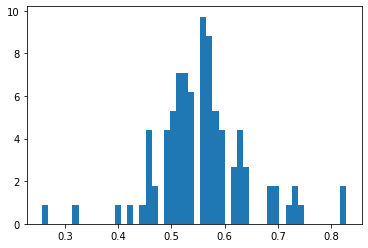

In [6]:
# Distribution of GC Content 
plt.hist([s.num_stats()[2] for s in dna.sequences], bins=50, density=True ); 
plt.xlabel = 'GC content'
plt.title = "Distribution of GC content"
plt.show();


In [7]:
lif_fname = "../data/BRCA1_NCBI_sequence.fasta"
dna = Dna()
dna.gene_load(lif_fname)
print("Breast Cancer - BCRA1\n", dna)

Breast Cancer - BCRA1
 DNA: # seqs: 1773 	 counter: 4
1. Count of bases 
	Base T : 33853 0.2729464314509627
	Base A : 32674 0.26344051343245073
	Base G : 29224 0.23562421388718677
	Base C : 28277 0.2279888412293998

2. GC Content 
	GC Content: 0.46361305511658657

3. Sample 3 

	Start of seq 	Count 	GC Content
	GAATTCC 	 70 	 0.5714285714285714
	GGCAGGC 	 70 	 0.6
	GGGCCAG 	 70 	 0.7285714285714285
	CCGGGGC 	 70 	 0.5714285714285714



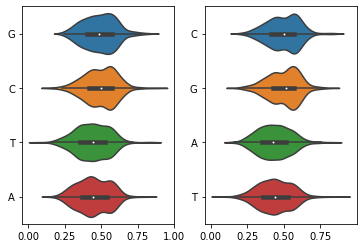

In [8]:
## Start base
plt.subplot(1,2,1)
sns.violinplot(
    y=[s.num_stats()[0][0] for s in dna.sequences ], 
    x=[ s.num_stats()[2] for s in dna.sequences ],
);

## End base
plt.subplot(1,2,2)
sns.violinplot(
    y=[s.num_stats()[0][-1] for s in dna.sequences ], 
    x=[ s.num_stats()[2] for s in dna.sequences ],
);

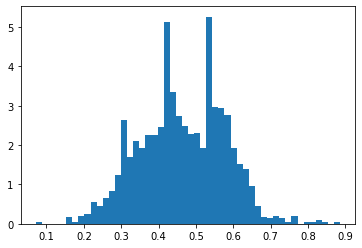

In [9]:
#plt.subplot(2,2,3)
plt.hist([s.num_stats()[2] for s in dna.sequences], bins=50, density=True ); 
plt.xlabel = 'GC content'
plt.title = "Distribution of GC content"
plt.show();

# BioPython

[Ref Tutorial](https://youtu.be/qQ7rIpB4oOw?t=1041)

BioPython functionalities
- Sequences Operations by type @ DNA, RNA, proteins
    - transcription, translation
    - 
- 3D structure handling 
- Population genetics e.g. population patterns 

In [10]:
#import statistics
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna, generic_rna, generic_protein, generic_nucleotide

In [11]:
## BioSeq
lif_fname = "../data/LIF_NCBI_sequence.fasta"
dna = Dna()
dna.gene_load(lif_fname)
#print("Leukemia - LIF\n", dna)

LIF_Seqs = [ Seq(s.seq, generic_dna) for s in dna.sequences]

In [12]:
tmp = LIF_Seqs[0]
print(type( tmp ) )
print( tmp.alphabet )
print(f"\n{tmp}\n")
print([ s for s in dir(LIF_Seqs[0]) if not s.startswith('_') ] )



<class 'Bio.Seq.Seq'>
DNAAlphabet()

GAATTCCCAGTGCCCAGAGAGCTGCTTCCTTACCTGCTGAGTAACCACTGCCCACACAGGATGCCTGGCT

['alphabet', 'back_transcribe', 'complement', 'count', 'count_overlap', 'encode', 'endswith', 'find', 'index', 'join', 'lower', 'lstrip', 'reverse_complement', 'rfind', 'rindex', 'rsplit', 'rstrip', 'split', 'startswith', 'strip', 'tomutable', 'transcribe', 'translate', 'ungap', 'upper']


In [19]:
## Transcription and Translation
tmp = LIF_Seqs[-1]

# 1. transcribe = make copy of some gene - DNA to RNA; same except Ts are Us
mRNA = tmp.transcribe()
print(f"DNA: {tmp.alphabet} \n{tmp}\n")
print(f"mRNA: {mRNA.alphabet} \n{mRNA}\n")

# 2. translate = manufacture protein coded by the gene 
protein = mRNA.translate()
print(f"protein from mRNA: {protein.alphabet} \n{protein}\n")

# 3. From DNA straight to protein
# stop codons represented as '*' and so use to_stop to force stop
# can force a valid start and stop coding seq by setting cds to true. Will throw error if invalid gene
protein2 = tmp.translate(to_stop=True) #, cds=True)
print(f"protein from DNA: {protein2.alphabet} \n{protein2}\n")


DNA: DNAAlphabet() 
GGCAGGTTCCCAGAGTCCTCCCGGG

mRNA: RNAAlphabet() 
GGCAGGUUCCCAGAGUCCUCCCGGG

protein from mRNA: ExtendedIUPACProtein() 
GRFPESSR

protein from DNA: ExtendedIUPACProtein() 
GRFPESSR



In [14]:
#### Concatenating sequences if they are matching types
# Seq objects behave like strings. BUT are not mutable
# Can make mutable by converting seq.tomutable() 

s1 = LIF_Seqs[0][:5] 
s2 = LIF_Seqs[-1][-5:]
print(s1,"\t",s2,"\t",s1+s2)

## Find and counts segments. Counts is non-overlapping 
for sf in ['GAA', "TAC", "GCA", "CTTA"]:
    print( f"Found {sf} at: {tmp.find(sf)} \t its count is {tmp.count(sf)}")

GAATT 	 CCGGG 	 GAATTCCGGG
Found GAA at: -1 	 its count is 0
Found TAC at: -1 	 its count is 0
Found GCA at: 1 	 its count is 1
Found CTTA at: -1 	 its count is 0


## Database Searching

**BLAST** 
- An alignment algorithm that searches the origin organism of a sequences in a big DB say NCBI. Alternative would be to take the string and go to NCBI and do a search


In [15]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML # results of blast search results is xml


In [16]:
## do blast seach with blastn algoritm
s = "AAAAGGAGAGAGAGTTTATA" #"AGGTTCCCAGAGTC"
tmp2 = Seq( s, generic_dna)
res = NCBIWWW.qblast('blastn', 'nt', tmp2) #alg, type(nt=nucleotides), seq
## result is an xml file so use parser
result = NCBIXML.parse( res )
print(result)

<generator object parse at 0x7fbbad2bc6d0>


In [18]:
# the parsed result is an iterator
for b in result:
    for rec in B.alignments:
        for al in rec.hsps:
            print("*** Alignment ***")
            print( f"Seq: {rec.title}\tlen: {rec.length}\te value: {al.expect}")
            print(f"{al.query[:75]} ..." )
            print(f"{al.match[:75]} ..." )
            print(f"{al.sbjct[:75]} ..." )

## SeqRecord and SeqIO

- Access more information e.g. source species and parse files 
- 

In [110]:
from Bio import SeqIO 
from Bio.SeqRecord import SeqRecord ## can create own and save as fasta


In [109]:
# Source: https://www.ncbi.nlm.nih.gov/genbank/ 
bubonic_fname = "../data/YPBA_NCBI_GEN_sequence.fasta"

BUB_seqs = SeqIO.parse( bubonic_fname, 'fasta')
dtmp = None
for r in BUB_seqs:
    print(f"{type(r)}\nName: {r.name}\nDesc: {r.description}\n")
    dtmp = r

print([ s for s in dir(dtmp) if not s.startswith('_') ] )

print("\n", dtmp)

<class 'Bio.SeqRecord.SeqRecord'>
Name: ADRZ01000932.1
Desc: ADRZ01000932.1 Yersinia pestis biovar Antiqua str. E1979001 Contig_E1979001_19275, whole genome shotgun sequence

['annotations', 'dbxrefs', 'description', 'features', 'format', 'id', 'letter_annotations', 'lower', 'name', 'reverse_complement', 'seq', 'translate', 'upper']

 ID: ADRZ01000932.1
Name: ADRZ01000932.1
Description: ADRZ01000932.1 Yersinia pestis biovar Antiqua str. E1979001 Contig_E1979001_19275, whole genome shotgun sequence
Number of features: 0
Seq('CTCTCCCAGCTGAGCTATAGCCCCAATGCGCACATAATAAATCGTGTGAACGGG...AGC', SingleLetterAlphabet())


In [111]:
## Can create SeqRecord(Seq()) e.g. after new edits and save as fasta


## Alignments and Phylogenetic Trees

## 3D Molecular  Structures with BiPython

[Part 2 of Tutorial](https://www.youtube.com/watch?v=mL8NPpRxgJA&list=PLfclbddrqrdm29HaMHxmcWBbECU9vJZJZ)


Data Source: 
- [**Protein Data Bank (PDB)**](http://www.rcsb.org/pdb/home/home.do)
-

**Biomolecule Structure**
- Proteins, DNA, RNA, chemicals (e.g. dopamine) 
- Biological function is determined by structure
- X-ray crystallography 

**3D Structure on BioPython**
- `Bio.PDB` module 
- File format 'mmCIF'
- **Visualizing the 3D Structyre**
    - [`bioconda`](https://bioconda.github.io/user/install.html): works with jupyter notebook as widget
    - [`PyMOL`](https://pymol.org/2/): 

In [27]:
from Bio.PDB import *

In [32]:
## Dopamine transpoerter protein 
prot_seq = Seq("DERETWSGKVDFLLSVIGFAVDLANVWRFPYLCYKNGGGAFLVPYGIMLAVGGIPLFYMELALGQHNRKGAITCWGRLVP\
LFKGIGYAVVLIAFYVDFYYNVIIAWSLRFFFASFTNSLPWTSCNNIWNTPNCRPFEGHVEGFQSAASEYFNRYILELNR\
SEGIHDLGAIKWDMALCLLIVYLICYFSLWKGISTSGKVVWFTALFPYAVLLILLIRGLTLPGSFLGIQYYLTPNFSAIY\
KAEVWVDAATQVFFSLGPGFGVLLAYASYNKYHNNVYKDALLTSFINSATSFIAGFVIFSVLGYMAHTLGVRIEDVATEG\
PGLVFVVYPAAIATMPASTFWALIFFMMLATLGLDSSFGGSEAIITALSDEFPKIKRNRELFVAGLFSLYFVVGLASCTQ\
GGFYFFHLLDRYAAGYSILVAVFFEAIAVSWIYGTNRFSEDIRDMIGFPPGRYWQVCWRFVAPIFLLFITVYGLIGYEPL\
TYADYVYPSWANALGWCIAGSSVVMIPAVAIFKLLSTPGSLRQRFTILTTPWRDQ" , generic_protein)

print( type(prot_seq))
#print( prot_seq)

<class 'Bio.Seq.Seq'>


In [28]:
pdbl = PDBList()
pdbl.retrieve_pdb_file('4XP1')

'/mnt/externz/zRepoz/003_school/notebooks/xp/4xp1.cif'

In [33]:
parser = MMCIFParser()

In [35]:
struct = parser.get_structure('4XP1', "xp/4xp1.cif")

/home/bilha/anaconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7523.
  PDBConstructionWarning,
/home/bilha/anaconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 7658.
  PDBConstructionWarning,
/home/bilha/anaconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7659.
  PDBConstructionWarning,
/home/bilha/anaconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 7674.
  PDBConstructionWarning,
/home/bilha/anaconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 7677.
  PDBConstructionWarning,


In [36]:

print([ s for s in dir(struct) if not s.startswith('_') ] )

['add', 'child_dict', 'child_list', 'copy', 'detach_child', 'detach_parent', 'full_id', 'get_atoms', 'get_chains', 'get_full_id', 'get_id', 'get_iterator', 'get_level', 'get_list', 'get_models', 'get_parent', 'get_residues', 'has_id', 'header', 'id', 'insert', 'level', 'parent', 'set_parent', 'transform', 'xtra']


In [ ]:
## nglview
import nglview as nv


In [ ]:
## atom ball and sticks structure view 
view = nv.show_biopytho(struct)
view.clear_represetntations()
view.add_ball_and_stick()
view

In [ ]:
## cartoon ribbon representation 
view.clear_represetntations()
view.add_cartoon("protein")
view.add_ball_and_stick("not protein")
view

In [40]:
## Parsing the structure object
for model in struct:
    print( f"model{model}" )

model<Model id=0>


In [50]:
mode = struct[0]
for chain in model:
    print( f"chain:{chain} \t{chain.id} \t{len(chain)}" )

chain:<Chain id=A> 	A 	559
chain:<Chain id=L> 	L 	218
chain:<Chain id=H> 	H 	222
chain:<Chain id=B> 	B 	2
chain:<Chain id=C> 	C 	2


In [53]:
chain = model['A']
for i, prot in enumerate(chain):
    print( f"Residue:{prot.resname} \t{prot.id} \t{len(prot)}" )
    if i>= 3:
        break

Residue:ASP 	(' ', 25, ' ') 	8
Residue:GLU 	(' ', 26, ' ') 	9
Residue:ARG 	(' ', 27, ' ') 	11
Residue:GLU 	(' ', 28, ' ') 	9


In [54]:
residue = chain[156]
print( residue ,"\n---\n")
for i, atom in enumerate(residue):
    print( f"Atom:{atom.name} \t{atom}" )
    if i>= 3:
        break

<Residue ASN het=  resseq=156 icode= > 
---

Atom:N 	<Atom N>
Atom:CA 	<Atom CA>
Atom:C 	<Atom C>
Atom:O 	<Atom O>


### Mini Project - Find Dopamine Binding Pockets

- Two ways: 1). parsing the mmCIF file and 2). Bio.Atom functions 

- nonpolymers = not protein, DNA or RNA = is chemical 
- CA atom is often used as reference point at distances. Distance = diff between atoms

In [64]:
struct_dict = MMCIF2Dict.MMCIF2Dict('xp/4xp1.cif')

print("# Keys = ", len( struct_dict.keys()))

#struct_dict

# Keys =  845


In [60]:
## structure site => binding sites 
struct_dict.get('_struct_site.details', "Not Found")

'Not Found'

In [63]:
## Residues in a binding site
struct_dict.get('_struct_site_gen', "Not Found")

'Not Found'

In [69]:
LDP = None
for i, res in enumerate(struct[0].get_residues() ):
    if res.resname == 'LDP':
        print( f"Atom:{res.resname} \t{res}" )
        LDP = res
        break
#print(LDP)

Atom:LDP 	<Residue LDP het=H_LDP resseq=708 icode= >


In [83]:
### Find other residues that are nearby that we can say they are a binding residue
# doable b/c every atom has x,y coordinates
# CA atom is often used as reference point at distances
print( f"Residue:{LDP.resname} \t{LDP.id} \t{len(LDP)}" )

ref_atom = None

print( f"{'-'*43}\nAtom Name\tAtom Coordinates\n{'-'*43}")
for i, atom in enumerate(LDP):
    print( f"{atom.name}\t\t{atom.coord}" )
    if i == 1:
        ref_atom = atom

Residue:LDP 	('H_LDP', 708, ' ') 	22
-------------------------------------------
Atom Name	Atom Coordinates
-------------------------------------------
C7		[ -9.19    2.991 -26.818]
C1		[-10.34    3.577 -26.027]
C4		[-12.498   4.64  -24.661]
C2		[-10.201   3.953 -24.698]
C6		[-11.552   3.736 -26.67 ]
C5		[-12.63    4.265 -25.988]
C3		[-11.286   4.483 -24.014]
O1		[-11.168   4.87  -22.666]
O2		[-13.604   5.179 -23.976]
C8		[ -8.275   2.214 -25.896]
N1		[ -7.384   1.41  -26.667]
H71		[ -8.685   3.713 -27.243]
H72		[ -9.541   2.392 -27.507]
H2		[ -9.344   3.84  -24.244]
H6		[-11.647   3.471 -27.604]
H5		[-13.487   4.376 -26.443]
HO1		[-10.973   5.736 -22.623]
HO2		[-14.25    4.57  -23.931]
H81		[ -8.813   1.638 -25.314]
H82		[ -7.758   2.84  -25.348]
HN11		[ -7.39    0.553 -26.344]
HN12		[ -6.536   1.753 -26.609]


In [95]:
# ldp_ca = LDP['CA']
# print(f"LDP CA: {ldp_ca}")

## The norm2 distance measure
import numpy as np
#np.linalg.norm([ a.coord - ref_atom.coord for a in LDP], axis=1 )



print( f"DISTANCE w/r/t Atom {ref_atom.name} at {ref_atom.coord}")
print( f"{'-'*63}\nAtom Name\tDistance\tDiff Coords\n{'-'*63}")
for i, atom in enumerate(LDP):
    print( f"{atom.name}\t{np.linalg.norm(atom.coord - ref_atom.coord)}\t{atom.coord - ref_atom.coord}" )
    if i == 1:
        ref_atom = atom


DISTANCE w/r/t Atom C1 at [-10.34    3.577 -26.027]
---------------------------------------------------------------
Atom Name	Distance	Diff Coords
---------------------------------------------------------------
C7	1.513796091079712	[ 1.1500006  -0.58599997 -0.79100037]
C1	0.0	[0. 0. 0.]
C4	2.766386032104492	[-2.158      1.063      1.3660011]
C2	1.388142466545105	[0.13899994 0.37600017 1.3290005 ]
C6	1.381185531616211	[-1.2119999   0.15900016 -0.64299965]
C5	2.3914356231689453	[-2.29        0.68799996  0.03899956]
C3	2.4016499519348145	[-0.9460001  0.9059999  2.0130005]
O1	3.695098876953125	[-0.82800007  1.293       3.361     ]
O2	4.174530506134033	[-3.264      1.602      2.0510006]
C8	2.4777321815490723	[ 2.0650005  -1.3629999   0.13100052]
N1	3.720675468444824	[ 2.9560003 -2.1669998 -0.6399994]
H71	2.058197021484375	[ 1.6549997   0.13600016 -1.2159996 ]
H72	2.05743145942688	[ 0.7989998 -1.185     -1.4799995]
H2	2.0591936111450195	[0.9960003 0.263     1.783001 ]
H6	2.0509543418884277	[

In [105]:
x = np.array( [ 1.1500006, -0.58599997, -0.79100037] )
np.sqrt( np.sum( x * x) )

1.5137961983637354

In [106]:
x*x, x@x, x**2

(array([1.32250138, 0.34339596, 0.62568159]),
 2.291578930180498,
 array([1.32250138, 0.34339596, 0.62568159]))